# 예측사고율 변화 검정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/mrg07/Desktop/dataset0928찐최종.csv")

### 최종 전처리 진행

<Axes: >

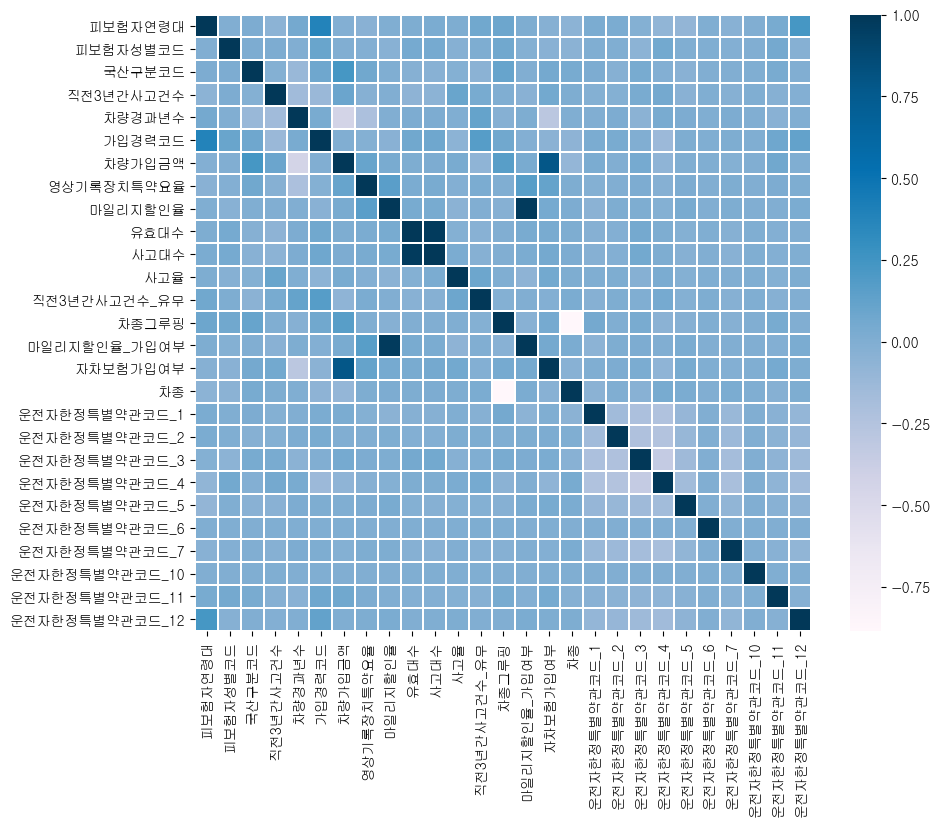

In [29]:
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white")

In [3]:
df = pd.get_dummies(df, columns = ['직전3년간사고건수'], drop_first = False)

In [4]:
df['마일리지할인율_재범주']=0
df.loc[df['마일리지할인율'] == 0, '마일리지할인율_재범주'] = 1
df.loc[df['마일리지할인율'] == 3000, '마일리지할인율_재범주'] = 2
df.loc[df['마일리지할인율'] == 5000, '마일리지할인율_재범주'] = 2
df.loc[df['마일리지할인율'] == 7000, '마일리지할인율_재범주'] = 2
df.loc[df['마일리지할인율'] == 10000, '마일리지할인율_재범주'] = 2
df.loc[df['마일리지할인율'] == 12000, '마일리지할인율_재범주'] = 3
df.loc[df['마일리지할인율'] == 15000, '마일리지할인율_재범주'] = 3
df=pd.get_dummies(df, columns = ['마일리지할인율_재범주'], drop_first = False)
df=df.drop(['마일리지할인율'],axis=1)

In [5]:
df['고경력운전자']=0
df.loc[df['가입경력코드'] == 8, '고경력운전자'] = 1
df['저경력운전자']=0
df.loc[df['가입경력코드'] == 1, '저경력운전자'] = 1
#30~50대를 구분하는 변수를 하나 넣었어요.. ! 데이터를 가만히 들여다보니 30~50대가 사고율이 낮은데 연령대를 순서형으로 사용해서 실제 사고율에 미치는 영향보다 뻥튀기된 것 같더라고요.. ^ㅡㅜ
df['30대~50대']=0
df.loc[df['피보험자연령대'] == 30, '30대~50대'] = 1
df.loc[df['피보험자연령대'] == 40, '30대~50대'] = 1
df.loc[df['피보험자연령대'] == 50, '30대~50대'] = 1

In [6]:
df=df.drop(['유효대수','사고대수'],axis=1)

In [7]:
df['이상치']=0
df.loc[df['사고율'] >= 1, '이상치'] = 1

In [8]:
from sklearn.model_selection import train_test_split
X = df.drop(["이상치",'사고율'], axis=1)
y = df[["이상치",'사고율']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=31)

# 분류모델(기준 1)

분류모델 - 로지스틱
로지스틱 쓴 이유? 변수 유의 확인해서 특약들이 중요변수다 강조하려고

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.metrics import matthews_corrcoef

In [10]:
class_y_train=y_train['이상치']
class_y_test=y_test['이상치']

In [11]:
#모든 변수를 모델링에 넣으면 모델이 수렴하지 않는 문제가 생겨 최대한 기존의 변수를 살림
#R 로지스틱 회귀 모델에서 유의하지 않다고 나온 변수들을 제거 
class_X_train = X_train.drop(['직전3년간사고건수_유무','운전자한정특별약관코드_2','운전자한정특별약관코드_5','운전자한정특별약관코드_6','운전자한정특별약관코드_7','운전자한정특별약관코드_10','운전자한정특별약관코드_11','운전자한정특별약관코드_12','저경력운전자','차량가입금액','마일리지할인율_재범주_2','차종그루핑','자차보험가입여부'
],axis=1)
class_X_test = X_test.drop(['직전3년간사고건수_유무','운전자한정특별약관코드_2','운전자한정특별약관코드_5','운전자한정특별약관코드_6','운전자한정특별약관코드_7','운전자한정특별약관코드_10','운전자한정특별약관코드_11','운전자한정특별약관코드_12','저경력운전자','차량가입금액','마일리지할인율_재범주_2','차종그루핑','자차보험가입여부'
],axis=1)

In [12]:
class_X_train.columns

Index(['피보험자연령대', '피보험자성별코드', '국산구분코드', '차량경과년수', '가입경력코드', '영상기록장치특약요율',
       '마일리지할인율_가입여부', '차종', '운전자한정특별약관코드_1', '운전자한정특별약관코드_3', '운전자한정특별약관코드_4',
       '직전3년간사고건수_0', '직전3년간사고건수_1', '직전3년간사고건수_2', '직전3년간사고건수_3',
       '직전3년간사고건수_4', '마일리지할인율_재범주_1', '마일리지할인율_재범주_3', '고경력운전자', '30대~50대'],
      dtype='object')

In [13]:
# 마일리지할인율_가입여부  와    원래 마일리지할인율   의 상관계수가 너무 높아서 마일리지할인율_가입여부만 남기는 변수선택
class_X_train = class_X_train.drop(['마일리지할인율_재범주_1', '마일리지할인율_재범주_3'], axis=1)
class_X_test = class_X_test.drop(['마일리지할인율_재범주_1', '마일리지할인율_재범주_3'], axis=1)

In [14]:
class_X_train.columns

Index(['피보험자연령대', '피보험자성별코드', '국산구분코드', '차량경과년수', '가입경력코드', '영상기록장치특약요율',
       '마일리지할인율_가입여부', '차종', '운전자한정특별약관코드_1', '운전자한정특별약관코드_3', '운전자한정특별약관코드_4',
       '직전3년간사고건수_0', '직전3년간사고건수_1', '직전3년간사고건수_2', '직전3년간사고건수_3',
       '직전3년간사고건수_4', '고경력운전자', '30대~50대'],
      dtype='object')

In [15]:
import statsmodels.api as sm
model = sm.Logit(class_y_train, class_X_train)
results = model.fit(maxiter=1000)
results.summary()

Optimization terminated successfully.
         Current function value: 0.386069
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    이상치   No. Observations:               134116
Model:                          Logit   Df Residuals:                   134098
Method:                           MLE   Df Model:                           17
Date:                Sun, 08 Oct 2023   Pseudo R-squ.:                 0.04916
Time:                        19:17:37   Log-Likelihood:                -51778.
converged:                       True   LL-Null:                       -54455.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
피보험자연령대           0.0060      0.001      9.180      0.000       0.005       0.007
피보험자성별코드         -0.2205      0.016    -13.500      0.000      -0.252      -0.188
국산구분코드            0.1914      0.018     10.819      0.000       0.157       0.226
차량경과년수           -0.0202      0.009     -2.337      0.019      -0.037      -0.003
가입경력코드           -0.0909      0.006    -15.933      0.000      -0.102      -0.080
영상기록장치특약요율       -0.1074      0.017     -6.332      0.000      -0.141      -0.074
마일리지할인율_가입여부     -0.3175      0.017    -18.978      0.000      -0.350      -0.285
차종               -0.0306      0.006     -5.388      0.000      -0.042      -0.019
운전자한정특별약관코드_1    -0.0517      0.026     -2.011      0.044      -0.102      -0.001
운전자한정특별약관코드_3    -0.4317      0.022    -19.309      0.000      -0.475      -0.388
운전자한정특별약관코드_4    -0.3027      0.021    -14.760      0.000      -0.343      -0.262
직전3년간사고건수_0      -1.0028      0.061    -16.362      0.000      -1.123      -0.883
직전3년간사고건수_1      -0.5252      0.062     -8.422      0.000      -0.647      -0.403
직전3년간사고건수_2      -0.0628      0.064     -0.981      0.326      -0.188       0.063
직전3년간사고건수_3       0.5123      0.066      7.821      0.000       0.384       0.641
직전3년간사고건수_4      -0.4990      0.059     -8.493      0.000      -0.614      -0.384
고경력운전자           -0.4437      0.027    -16.378      0.000      -0.497      -0.391
30대~50대          -0.2401      0.018    -13.009      0.000      -0.276      -0.204
=================================================================================
"""

In [16]:
#추가적으로 유의하지 않다고 나온 변수 제거
class_X_train=class_X_train.drop(['직전3년간사고건수_2'],axis=1)
class_X_test=class_X_test.drop(['직전3년간사고건수_2'],axis=1)

In [17]:
model = sm.Logit(class_y_train, class_X_train)
results = model.fit(maxiter=1000)
results.summary()

Optimization terminated successfully.
         Current function value: 0.386073
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    이상치   No. Observations:               134116
Model:                          Logit   Df Residuals:                   134099
Method:                           MLE   Df Model:                           16
Date:                Sun, 08 Oct 2023   Pseudo R-squ.:                 0.04915
Time:                        19:17:39   Log-Likelihood:                -51779.
converged:                       True   LL-Null:                       -54455.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
피보험자연령대           0.0057      0.001      9.673      0.000       0.005       0.007
피보험자성별코드         -0.2271      0.015    -15.288      0.000      -0.256      -0.198
국산구분코드            0.1862      0.017     11.034      0.000       0.153       0.219
차량경과년수           -0.0227      0.008     -2.742      0.006      -0.039      -0.006
가입경력코드           -0.0927      0.005    -17.227      0.000      -0.103      -0.082
영상기록장치특약요율       -0.1104      0.017     -6.620      0.000      -0.143      -0.078
마일리지할인율_가입여부     -0.3196      0.017    -19.272      0.000      -0.352      -0.287
차종               -0.0325      0.005     -6.074      0.000      -0.043      -0.022
운전자한정특별약관코드_1    -0.0544      0.026     -2.130      0.033      -0.105      -0.004
운전자한정특별약관코드_3    -0.4344      0.022    -19.587      0.000      -0.478      -0.391
운전자한정특별약관코드_4    -0.3059      0.020    -15.106      0.000      -0.346      -0.266
직전3년간사고건수_0      -0.9480      0.025    -37.879      0.000      -0.997      -0.899
직전3년간사고건수_1      -0.4697      0.026    -17.931      0.000      -0.521      -0.418
직전3년간사고건수_3       0.5688      0.031     18.134      0.000       0.507       0.630
직전3년간사고건수_4      -0.4471      0.025    -17.569      0.000      -0.497      -0.397
고경력운전자           -0.4366      0.026    -16.717      0.000      -0.488      -0.385
30대~50대          -0.2454      0.018    -13.931      0.000      -0.280      -0.211
=================================================================================
"""

In [18]:
#최종 모델 적합
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(class_X_train, class_y_train)
y_pred = model.predict(class_X_test)

In [19]:
y_prob = model.predict_proba(class_X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(class_y_test, y_prob)

In [20]:
roc_auc = auc(fpr, tpr)
roc_auc

0.6642386945233786

In [21]:
optimal_idx=np.argmax(tpr-fpr)
optimal=thresholds[optimal_idx]

optimal

0.12759193577314337

In [22]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(class_X_train,class_y_train)
threshold=optimal
y_prob=model.predict_proba(class_X_test)[:,1]
y_pred=(y_prob>threshold).astype(int)

In [23]:
test_pred=pd.DataFrame(y_pred,columns=['이상치 예측'])
idx=X_test.index
test_pred.set_index(idx,inplace=True)
res=pd.concat([X_test,y_test],axis=1)
res=pd.concat([res,test_pred],axis=1)
res.head()

,피보험자연령대,피보험자성별코드,국산구분코드,차량경과년수,가입경력코드,차량가입금액,영상기록장치특약요율,직전3년간사고건수_유무,차종그루핑,마일리지할인율_가입여부,...,직전3년간사고건수_4,마일리지할인율_재범주_1,마일리지할인율_재범주_2,마일리지할인율_재범주_3,고경력운전자,저경력운전자,30대~50대,이상치,사고율,이상치 예측
137797,70,1,1,2,8,0,0,1,0,1,...,0,0,0,1,1,0,0,0,0.333333,0
105101,50,2,1,3,8,0,0,0,1,1,...,0,0,0,1,1,0,1,0,0.102345,0
47832,30,2,1,1,7,1,1,0,0,0,...,1,1,0,0,0,0,1,0,0.000000,1
117700,60,1,1,2,7,1,0,0,0,1,...,0,0,0,1,0,0,0,1,1.000000,1
33428,30,1,2,0,4,2,1,0,0,0,...,1,1,0,0,0,0,1,0,0.000000,1


In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
report = classification_report(class_y_test, y_pred)
print("분류 보고서:\n", report)

분류 보고서:
               precision    recall  f1-score   support

           0       0.92      0.55      0.69     28935
           1       0.20      0.69      0.30      4594

    accuracy                           0.57     33529
   macro avg       0.56      0.62      0.50     33529
weighted avg       0.82      0.57      0.63     33529



In [25]:
print(f1_score(class_y_test,y_pred))
print(f1_score(class_y_test,y_pred,average='macro'))
print(f1_score(class_y_test,y_pred,average='weighted'))

0.3049137806811086
0.495976430122989
0.6346819074728894


In [26]:
confusion = confusion_matrix(class_y_test,y_pred)
confusion

array([[15884, 13051],
       [ 1420,  3174]], dtype=int64)

## 사고율 1 이상 Regressor

In [9]:
X_train=X_train.drop('30대~50대',axis=1)
X_test=X_test.drop('30대~50대',axis=1)
up_y_train=y_train[y_train['사고율']>=1]
idx=up_y_train.index
up_X_train=X_train.loc[idx]
up_y_train=up_y_train['사고율']

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error

In [11]:
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

In [12]:
ensemble_model1 = VotingRegressor(estimators=[('dt', dt_model), ('rf', rf_model), ('gb', gb_model)])

In [13]:
ensemble_model1.fit(up_X_train, up_y_train)

VotingRegressor(estimators=[('dt', DecisionTreeRegressor(random_state=42)),
                            ('rf', RandomForestRegressor(random_state=42)),
                            ('gb', GradientBoostingRegressor(random_state=42))])

## 사고율 1 미만 Regressor

In [24]:
down_y_train=y_train[y_train['사고율']<1]
idx=down_y_train.index
down_X_train=X_train.loc[idx]
down_y_train=down_y_train['사고율']

In [25]:
dt_model=DecisionTreeRegressor(random_state=42)
rf_model=RandomForestRegressor(random_state=42)
gb_model=GradientBoostingRegressor(random_state=42)

In [26]:
ensemble_model2 = VotingRegressor(estimators=[('dt', dt_model), ('rf', rf_model), ('gb', gb_model)])

In [27]:
ensemble_model2.fit(down_X_train, down_y_train)

VotingRegressor(estimators=[('dt', DecisionTreeRegressor(random_state=42)),
                            ('rf', RandomForestRegressor(random_state=42)),
                            ('gb', GradientBoostingRegressor(random_state=42))])

사고율 1 이상인 모델만 사용하겠음!

1. 블박0&사고율1이상인애들만 따로 저장해서 사고율1이상모델로 예측사고율 구해 --> df_블박0&사고율1이상인애들에 붙여

2. 마일리지0&사고율1이상인 애들만 따로 저장해서 1로 바꾼 뒤 사고율1이상모델로 예측사고율 구해 --> df_마일리지0&사고율1이상인애들에 붙여

3. 블박과 마일리지 간에 교호작용 때문에 사고율에 영향을 미칠 수 있으니, 블박0&마일리지0&사고율1이상인 애들을 둘다 1로 바꾼 뒤 사고율1이상모델로 예측사고율 구해 --> df_블박0&마일리지0&사고율1이상인애들에 붙여

# 1.

In [14]:
# 전처리 다시
df = pd.read_csv("C:/Users/mrg07/Desktop/dataset0928찐최종.csv")

df = pd.get_dummies(df, columns = ['직전3년간사고건수'], drop_first = False)

df['마일리지할인율_재범주']=0
df.loc[df['마일리지할인율'] == 0, '마일리지할인율_재범주'] = 1
df.loc[df['마일리지할인율'] == 3000, '마일리지할인율_재범주'] = 2
df.loc[df['마일리지할인율'] == 5000, '마일리지할인율_재범주'] = 2
df.loc[df['마일리지할인율'] == 7000, '마일리지할인율_재범주'] = 2
df.loc[df['마일리지할인율'] == 10000, '마일리지할인율_재범주'] = 2
df.loc[df['마일리지할인율'] == 12000, '마일리지할인율_재범주'] = 3
df.loc[df['마일리지할인율'] == 15000, '마일리지할인율_재범주'] = 3
df=pd.get_dummies(df, columns = ['마일리지할인율_재범주'], drop_first = False)
df=df.drop(['마일리지할인율'],axis=1)

df['고경력운전자']=0
df.loc[df['가입경력코드'] == 8, '고경력운전자'] = 1
df['저경력운전자']=0
df.loc[df['가입경력코드'] == 1, '저경력운전자'] = 1
#30~50대를 구분하는 변수를 하나 넣었어요.. ! 데이터를 가만히 들여다보니 30~50대가 사고율이 낮은데 연령대를 순서형으로 사용해서 실제 사고율에 미치는 영향보다 뻥튀기된 것 같더라고요.. ^ㅡㅜ
df['30대~50대']=0
df.loc[df['피보험자연령대'] == 30, '30대~50대'] = 1
df.loc[df['피보험자연령대'] == 40, '30대~50대'] = 1
df.loc[df['피보험자연령대'] == 50, '30대~50대'] = 1

df=df.drop(['유효대수','사고대수'],axis=1)
df['이상치']=0
df.loc[df['사고율'] >= 1, '이상치'] = 1

In [15]:
df.drop(['30대~50대', '이상치'], axis = 1, inplace = True)

In [16]:
df.columns

Index(['피보험자연령대', '피보험자성별코드', '국산구분코드', '차량경과년수', '가입경력코드', '차량가입금액',
       '영상기록장치특약요율', '사고율', '직전3년간사고건수_유무', '차종그루핑', '마일리지할인율_가입여부',
       '자차보험가입여부', '차종', '운전자한정특별약관코드_1', '운전자한정특별약관코드_2', '운전자한정특별약관코드_3',
       '운전자한정특별약관코드_4', '운전자한정특별약관코드_5', '운전자한정특별약관코드_6', '운전자한정특별약관코드_7',
       '운전자한정특별약관코드_10', '운전자한정특별약관코드_11', '운전자한정특별약관코드_12', '직전3년간사고건수_0',
       '직전3년간사고건수_1', '직전3년간사고건수_2', '직전3년간사고건수_3', '직전3년간사고건수_4',
       '마일리지할인율_재범주_1', '마일리지할인율_재범주_2', '마일리지할인율_재범주_3', '고경력운전자', '저경력운전자'],
      dtype='object')

In [17]:
# 가입자 특징 가지고 있는 블박 특약 미가입자 따로 저장

df = df[(df['피보험자연령대']==50)|(df['피보험자연령대']==60)|(df['차량경과년수']==1)|(df['차량경과년수']==2)]

df_no_bbox = df[(df['영상기록장치특약요율'] == 0) & (df['사고율'] >= 1)]
df_no_bbox.drop('사고율', axis = 1, inplace = True)
df_no_bbox.reset_index(inplace = True, drop = True)

C:\Users\mrg07\AppData\Local\Temp\ipykernel_848\3739167280.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_bbox.drop('사고율', axis = 1, inplace = True)


In [18]:
df_no_bbox

,피보험자연령대,피보험자성별코드,국산구분코드,차량경과년수,가입경력코드,차량가입금액,영상기록장치특약요율,직전3년간사고건수_유무,차종그루핑,마일리지할인율_가입여부,...,직전3년간사고건수_0,직전3년간사고건수_1,직전3년간사고건수_2,직전3년간사고건수_3,직전3년간사고건수_4,마일리지할인율_재범주_1,마일리지할인율_재범주_2,마일리지할인율_재범주_3,고경력운전자,저경력운전자
0,10,2,1,2,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1,20,1,1,2,7,0,0,1,1,1,...,0,0,0,1,0,0,0,1,0,0
2,20,1,1,1,2,1,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
3,20,1,1,1,5,1,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
4,20,1,1,2,6,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7756,40,2,1,1,8,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
7757,40,2,1,1,8,1,0,1,0,1,...,0,0,1,0,0,0,0,1,1,0
7758,40,2,1,2,8,1,0,1,0,1,...,0,0,1,0,0,0,0,1,1,0
7759,40,2,1,2,2,1,0,1,1,1,...,0,0,1,0,0,0,0,1,0,0


In [19]:
y_pred_b4 = pd.DataFrame(ensemble_model1.predict(df_no_bbox))
y_pred_b4.rename(columns = {0: "before"}, inplace=True)

In [20]:
y_pred_b4

,before
0,1.791442
1,1.161330
2,1.648808
3,1.111924
4,1.205400
...,...
7756,1.071777
7757,1.633845
7758,1.088580
7759,1.193169


In [21]:
df_b4 = pd.concat([df_no_bbox, y_pred_b4], axis = 1)

In [22]:
df_yes_bbox = df_no_bbox
df_yes_bbox['영상기록장치특약요율'] = 1

C:\Users\mrg07\AppData\Local\Temp\ipykernel_848\3628140874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yes_bbox['영상기록장치특약요율'] = 1


In [23]:
y_pred_aft = pd.DataFrame(ensemble_model1.predict(df_yes_bbox))
y_pred_aft.rename(columns = {0: "after"}, inplace=True)

In [24]:
df_bbox_final = pd.concat([df_b4, y_pred_aft], axis = 1)

In [25]:
df_bbox_final.tail(10)

,피보험자연령대,피보험자성별코드,국산구분코드,차량경과년수,가입경력코드,차량가입금액,영상기록장치특약요율,직전3년간사고건수_유무,차종그루핑,마일리지할인율_가입여부,...,직전3년간사고건수_2,직전3년간사고건수_3,직전3년간사고건수_4,마일리지할인율_재범주_1,마일리지할인율_재범주_2,마일리지할인율_재범주_3,고경력운전자,저경력운전자,before,after
7751,40,2,1,2,4,1,0,1,0,1,...,1,0,0,0,0,1,0,0,1.124691,1.098532
7752,40,2,1,2,4,1,0,1,0,0,...,1,0,0,1,0,0,0,0,2.177939,1.119478
7753,40,2,1,2,6,1,0,1,0,1,...,1,0,0,0,0,1,0,0,3.348561,1.286602
7754,40,2,1,2,4,0,0,1,1,0,...,1,0,0,1,0,0,0,0,1.132041,1.141110
7755,40,2,1,2,7,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1.116053,1.135705
7756,40,2,1,1,8,0,0,1,0,0,...,1,0,0,1,0,0,1,0,1.071777,1.085569
7757,40,2,1,1,8,1,0,1,0,1,...,1,0,0,0,0,1,1,0,1.633845,1.672309
7758,40,2,1,2,8,1,0,1,0,1,...,1,0,0,0,0,1,1,0,1.088580,1.105099
7759,40,2,1,2,2,1,0,1,1,1,...,1,0,0,0,0,1,0,0,1.193169,1.522232
7760,40,2,1,1,8,2,0,1,1,0,...,1,0,0,1,0,0,1,0,1.085740,1.096854


In [26]:
# df_bbox_final.to_csv("C:/Users/mrg07/Desktop/블박특약전후_1008.csv", index = False)

차이가 1(유동) 이상으로 크게 나는 애들만 선별

In [27]:
df_bbox_decrease = df_bbox_final[(df_bbox_final['before'] - df_bbox_final['after'] > 1)]
df_bbox_decrease.reset_index(inplace = True, drop = True)

In [28]:
df_bbox_decrease['가입전후차이'] = df_bbox_decrease['before'] - df_bbox_decrease['after']

C:\Users\mrg07\AppData\Local\Temp\ipykernel_848\2003918807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bbox_decrease['가입전후차이'] = df_bbox_decrease['before'] - df_bbox_decrease['after']


In [29]:
df_bbox_decrease

,피보험자연령대,피보험자성별코드,국산구분코드,차량경과년수,가입경력코드,차량가입금액,영상기록장치특약요율,직전3년간사고건수_유무,차종그루핑,마일리지할인율_가입여부,...,직전3년간사고건수_3,직전3년간사고건수_4,마일리지할인율_재범주_1,마일리지할인율_재범주_2,마일리지할인율_재범주_3,고경력운전자,저경력운전자,before,after,가입전후차이
0,20,1,1,2,1,1,0,0,1,0,...,0,1,1,0,0,0,1,3.016598,1.863551,1.153047
1,20,2,1,2,4,1,0,0,0,1,...,0,0,0,0,1,0,0,4.142357,1.222093,2.920263
2,20,2,1,2,4,1,0,0,0,1,...,0,0,0,0,1,0,0,2.501496,1.092066,1.409430
3,20,2,1,2,1,0,0,0,1,0,...,0,1,1,0,0,0,1,3.546052,2.319420,1.226631
4,20,2,1,1,1,0,0,0,1,0,...,0,1,1,0,0,0,1,6.582916,2.733229,3.849687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,40,1,2,1,6,1,0,1,1,1,...,0,0,0,0,1,0,0,4.356004,1.367843,2.988160
92,40,2,1,2,8,1,0,1,0,1,...,1,0,0,0,1,1,0,3.881522,1.096648,2.784874
93,40,2,1,1,4,1,0,1,0,0,...,0,0,1,0,0,0,0,2.176321,1.136291,1.040030
94,40,2,1,2,4,1,0,1,0,0,...,0,0,1,0,0,0,0,2.177939,1.119478,1.058461


# 2.

In [30]:
# 전처리 다시
df = pd.read_csv("C:/Users/mrg07/Desktop/dataset0928찐최종.csv")

df = pd.get_dummies(df, columns = ['직전3년간사고건수'], drop_first = False)

df['마일리지할인율_재범주']=0
df.loc[df['마일리지할인율'] == 0, '마일리지할인율_재범주'] = 1
df.loc[df['마일리지할인율'] == 3000, '마일리지할인율_재범주'] = 2
df.loc[df['마일리지할인율'] == 5000, '마일리지할인율_재범주'] = 2
df.loc[df['마일리지할인율'] == 7000, '마일리지할인율_재범주'] = 2
df.loc[df['마일리지할인율'] == 10000, '마일리지할인율_재범주'] = 2
df.loc[df['마일리지할인율'] == 12000, '마일리지할인율_재범주'] = 3
df.loc[df['마일리지할인율'] == 15000, '마일리지할인율_재범주'] = 3
df=pd.get_dummies(df, columns = ['마일리지할인율_재범주'], drop_first = False)
df=df.drop(['마일리지할인율'],axis=1)

df['고경력운전자']=0
df.loc[df['가입경력코드'] == 8, '고경력운전자'] = 1
df['저경력운전자']=0
df.loc[df['가입경력코드'] == 1, '저경력운전자'] = 1
#30~50대를 구분하는 변수를 하나 넣었어요.. ! 데이터를 가만히 들여다보니 30~50대가 사고율이 낮은데 연령대를 순서형으로 사용해서 실제 사고율에 미치는 영향보다 뻥튀기된 것 같더라고요.. ^ㅡㅜ
df['30대~50대']=0
df.loc[df['피보험자연령대'] == 30, '30대~50대'] = 1
df.loc[df['피보험자연령대'] == 40, '30대~50대'] = 1
df.loc[df['피보험자연령대'] == 50, '30대~50대'] = 1

df=df.drop(['유효대수','사고대수'],axis=1)
df['이상치']=0
df.loc[df['사고율'] >= 1, '이상치'] = 1

In [31]:
df.drop(['30대~50대', '이상치'], axis = 1, inplace = True)

In [32]:
df = df[(df['피보험자연령대']==50) | (df['운전자한정특별약관코드_5']==1) | (df['차량경과년수']==3) | (df['차종']==3) | (df['직전3년간사고건수_0']==1)]


df_no_mile = df[(df['마일리지할인율_가입여부'] == 0) & (df['사고율'] >= 1)]
df_no_mile.drop('사고율', axis = 1, inplace = True)
df_no_mile.reset_index(inplace = True, drop = True)

C:\Users\mrg07\AppData\Local\Temp\ipykernel_848\886963301.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_mile.drop('사고율', axis = 1, inplace = True)


In [33]:
y_pred_b4 = pd.DataFrame(ensemble_model1.predict(df_no_mile))
y_pred_b4.rename(columns = {0: "before"}, inplace=True)

In [34]:
df_b4 = pd.concat([df_no_mile, y_pred_b4], axis = 1)

In [35]:
df_yes_mile = df_no_mile
df_yes_mile['마일리지할인율_가입여부'] = 1

C:\Users\mrg07\AppData\Local\Temp\ipykernel_848\3518068895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yes_mile['마일리지할인율_가입여부'] = 1


In [36]:
y_pred_aft = pd.DataFrame(ensemble_model1.predict(df_yes_mile))
y_pred_aft.rename(columns = {0: "after"}, inplace=True)

In [37]:
df_mile_final = pd.concat([df_b4, y_pred_aft], axis = 1)

In [38]:
df_mile_final.head(10)

,피보험자연령대,피보험자성별코드,국산구분코드,차량경과년수,가입경력코드,차량가입금액,영상기록장치특약요율,직전3년간사고건수_유무,차종그루핑,마일리지할인율_가입여부,...,직전3년간사고건수_2,직전3년간사고건수_3,직전3년간사고건수_4,마일리지할인율_재범주_1,마일리지할인율_재범주_2,마일리지할인율_재범주_3,고경력운전자,저경력운전자,before,after
0,10,2,1,2,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,1.791442,1.749527
1,20,1,1,2,6,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1.205400,1.163996
2,20,1,1,3,5,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1.157765,1.199491
3,20,1,1,3,8,0,0,1,0,0,...,0,1,0,1,0,0,1,0,1.150975,1.155250
4,20,1,1,1,4,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1.204792,1.200487
5,20,1,1,2,5,1,1,1,0,0,...,0,1,0,1,0,0,0,0,1.173958,1.182060
6,20,1,1,2,4,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1.158693,1.142721
7,20,1,1,3,3,0,1,1,0,0,...,0,1,0,1,0,0,0,0,1.155630,1.163203
8,20,1,1,2,5,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1.147002,1.133049
9,20,1,1,3,8,0,0,1,1,0,...,0,1,0,1,0,0,1,0,1.255948,1.393598


In [39]:
# df_mile_final.to_csv("C:/Users/mrg07/Desktop/마일리지특약전후_1008.csv", index = False)

In [40]:
df_mile_final

,피보험자연령대,피보험자성별코드,국산구분코드,차량경과년수,가입경력코드,차량가입금액,영상기록장치특약요율,직전3년간사고건수_유무,차종그루핑,마일리지할인율_가입여부,...,직전3년간사고건수_2,직전3년간사고건수_3,직전3년간사고건수_4,마일리지할인율_재범주_1,마일리지할인율_재범주_2,마일리지할인율_재범주_3,고경력운전자,저경력운전자,before,after
0,10,2,1,2,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,1.791442,1.749527
1,20,1,1,2,6,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1.205400,1.163996
2,20,1,1,3,5,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1.157765,1.199491
3,20,1,1,3,8,0,0,1,0,0,...,0,1,0,1,0,0,1,0,1.150975,1.155250
4,20,1,1,1,4,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1.204792,1.200487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5811,40,2,1,3,6,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1.445360,1.607163
5812,40,2,1,3,8,1,1,1,1,0,...,1,0,0,1,0,0,1,0,1.603851,1.240606
5813,40,2,1,2,4,1,0,1,0,0,...,1,0,0,1,0,0,0,0,2.177939,1.459325
5814,40,2,1,3,8,1,0,1,1,0,...,1,0,0,1,0,0,1,0,1.108382,1.126807


차이가 1(유동) 이상으로 크게 나는 애들만 선별

In [41]:
df_mile_decrease = df_mile_final[(df_mile_final['before'] - df_mile_final['after'] > 1)]
df_mile_decrease.reset_index(inplace = True, drop = True)

In [42]:
df_mile_decrease['가입전후차이'] = df_mile_decrease['before'] - df_mile_decrease['after']

C:\Users\mrg07\AppData\Local\Temp\ipykernel_848\1291838075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mile_decrease['가입전후차이'] = df_mile_decrease['before'] - df_mile_decrease['after']


In [43]:
df_mile_decrease

,피보험자연령대,피보험자성별코드,국산구분코드,차량경과년수,가입경력코드,차량가입금액,영상기록장치특약요율,직전3년간사고건수_유무,차종그루핑,마일리지할인율_가입여부,...,직전3년간사고건수_3,직전3년간사고건수_4,마일리지할인율_재범주_1,마일리지할인율_재범주_2,마일리지할인율_재범주_3,고경력운전자,저경력운전자,before,after,가입전후차이
0,20,2,1,3,7,1,0,0,0,0,...,0,1,1,0,0,0,0,2.836690,1.677892,1.158798
1,20,2,2,3,7,0,0,1,0,0,...,1,0,1,0,0,0,0,2.853115,1.746507,1.106608
2,30,1,1,1,8,1,0,1,0,0,...,1,0,1,0,0,1,0,5.495705,2.914301,2.581404
3,30,2,1,1,8,1,0,1,1,0,...,1,0,1,0,0,1,0,4.370356,1.550106,2.820250
4,30,2,1,2,6,0,1,1,0,0,...,0,0,1,0,0,0,0,2.231285,1.211639,1.019646
5,30,2,1,1,6,0,1,1,0,0,...,0,0,1,0,0,0,0,2.215263,1.203315,1.011947
6,30,2,1,2,6,0,0,1,0,0,...,0,0,1,0,0,0,0,2.715268,1.606099,1.109169
7,30,2,2,0,8,1,1,0,0,0,...,0,0,1,0,0,1,0,2.653115,1.480521,1.172594
8,40,2,1,1,6,1,1,0,1,0,...,0,0,1,0,0,0,0,3.384220,2.017780,1.366440
9,40,2,1,1,4,1,0,0,0,0,...,0,1,1,0,0,0,0,2.725134,1.538083,1.187051


# 3.

In [44]:
# 전처리 다시
df = pd.read_csv("C:/Users/mrg07/Desktop/dataset0928찐최종.csv")

df = pd.get_dummies(df, columns = ['직전3년간사고건수'], drop_first = False)

df['마일리지할인율_재범주']=0
df.loc[df['마일리지할인율'] == 0, '마일리지할인율_재범주'] = 1
df.loc[df['마일리지할인율'] == 3000, '마일리지할인율_재범주'] = 2
df.loc[df['마일리지할인율'] == 5000, '마일리지할인율_재범주'] = 2
df.loc[df['마일리지할인율'] == 7000, '마일리지할인율_재범주'] = 2
df.loc[df['마일리지할인율'] == 10000, '마일리지할인율_재범주'] = 2
df.loc[df['마일리지할인율'] == 12000, '마일리지할인율_재범주'] = 3
df.loc[df['마일리지할인율'] == 15000, '마일리지할인율_재범주'] = 3
df=pd.get_dummies(df, columns = ['마일리지할인율_재범주'], drop_first = False)
df=df.drop(['마일리지할인율'],axis=1)

df['고경력운전자']=0
df.loc[df['가입경력코드'] == 8, '고경력운전자'] = 1
df['저경력운전자']=0
df.loc[df['가입경력코드'] == 1, '저경력운전자'] = 1
#30~50대를 구분하는 변수를 하나 넣었어요.. ! 데이터를 가만히 들여다보니 30~50대가 사고율이 낮은데 연령대를 순서형으로 사용해서 실제 사고율에 미치는 영향보다 뻥튀기된 것 같더라고요.. ^ㅡㅜ
df['30대~50대']=0
df.loc[df['피보험자연령대'] == 30, '30대~50대'] = 1
df.loc[df['피보험자연령대'] == 40, '30대~50대'] = 1
df.loc[df['피보험자연령대'] == 50, '30대~50대'] = 1

df=df.drop(['유효대수','사고대수'],axis=1)
df['이상치']=0
df.loc[df['사고율'] >= 1, '이상치'] = 1

In [45]:
df.drop(['30대~50대', '이상치'], axis = 1, inplace = True)

In [46]:
# 둘의 특징을 모두 가지는 미가입자

df = df[(df['피보험자연령대']==50)|(df['피보험자연령대']==60)|(df['차량경과년수']==1)|(df['차량경과년수']==2)]
df = df[(df['피보험자연령대']==50) | (df['운전자한정특별약관코드_5']==1) | (df['차량경과년수']==3) | (df['차종']==3) | (df['직전3년간사고건수_0']==1)]

df_no_both = df[(df['영상기록장치특약요율'] == 0) & (df['마일리지할인율_가입여부']==0) & (df['사고율'] >= 1)]
df_no_both.drop('사고율', axis = 1, inplace = True)
df_no_both.reset_index(inplace = True, drop = True)

C:\Users\mrg07\AppData\Local\Temp\ipykernel_848\3303760842.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_both.drop('사고율', axis = 1, inplace = True)


In [47]:
y_pred_b4 = pd.DataFrame(ensemble_model1.predict(df_no_both))
y_pred_b4.rename(columns = {0: "before"}, inplace=True)

In [48]:
df_b4 = pd.concat([df_no_both, y_pred_b4], axis = 1)

In [49]:
df_yes_both = df_no_both
df_yes_both['영상기록장치특약요율'] = 1
df_yes_both['마일리지할인율_가입여부'] = 1

C:\Users\mrg07\AppData\Local\Temp\ipykernel_848\3906870097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yes_both['영상기록장치특약요율'] = 1
C:\Users\mrg07\AppData\Local\Temp\ipykernel_848\3906870097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yes_both['마일리지할인율_가입여부'] = 1


In [50]:
y_pred_aft = pd.DataFrame(ensemble_model1.predict(df_yes_both))
y_pred_aft.rename(columns = {0: "after"}, inplace=True)

In [51]:
df_both_final = pd.concat([df_b4, y_pred_aft], axis = 1)

In [53]:
# df_both_final.to_csv("C:/Users/mrg07/Desktop/both특약전후_1008.csv", index = False)

In [54]:
df_both_decrease = df_both_final[(df_both_final['before'] - df_both_final['after'] > 1)]
df_both_decrease.reset_index(inplace = True, drop = True)

In [55]:
df_both_decrease['가입전후차이'] = df_both_decrease['before'] - df_both_decrease['after']

C:\Users\mrg07\AppData\Local\Temp\ipykernel_848\80866886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_both_decrease['가입전후차이'] = df_both_decrease['before'] - df_both_decrease['after']


In [56]:
df_both_decrease

,피보험자연령대,피보험자성별코드,국산구분코드,차량경과년수,가입경력코드,차량가입금액,영상기록장치특약요율,직전3년간사고건수_유무,차종그루핑,마일리지할인율_가입여부,...,직전3년간사고건수_3,직전3년간사고건수_4,마일리지할인율_재범주_1,마일리지할인율_재범주_2,마일리지할인율_재범주_3,고경력운전자,저경력운전자,before,after,가입전후차이
0,30,1,1,1,8,1,0,1,0,0,...,1,0,1,0,0,1,0,5.495705,1.452836,4.042869
1,30,1,2,1,8,0,0,0,1,0,...,0,0,1,0,0,1,0,2.117613,1.093012,1.024600
2,30,2,1,2,8,1,0,1,0,0,...,1,0,1,0,0,1,0,2.232205,1.170139,1.062066
3,30,2,1,1,8,1,0,1,1,0,...,1,0,1,0,0,1,0,4.370356,1.245116,3.125241
4,30,2,1,2,6,0,0,1,0,0,...,0,0,1,0,0,0,0,2.715268,1.211639,1.503629
5,30,2,1,2,2,1,0,1,0,0,...,0,0,1,0,0,0,0,2.266330,1.155874,1.110456
6,30,2,1,1,4,1,0,0,0,0,...,0,0,1,0,0,0,0,2.196550,1.139997,1.056553
7,30,2,1,2,2,1,0,0,0,0,...,0,1,1,0,0,0,0,2.209448,1.156433,1.053015
8,40,2,1,1,4,1,0,0,0,0,...,0,1,1,0,0,0,0,2.725134,1.324807,1.400327
9,50,1,1,2,6,0,0,1,0,0,...,0,0,1,0,0,0,0,3.341034,1.353832,1.987203
